In [1]:
# Imports
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Modelos ajustados inicialmente
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))


In [3]:
# Dados do Brasil
url = "https://covid.ourworldindata.org/data/ecdc/total_cases.csv"
df = pd.read_csv(url)
df = df.loc[:,['date','Brazil']]
FMT = '%Y-%m-%d'
date = df['date']
df['data'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days  )
df=df.dropna()
df.head()


,date,Brazil,data
0,2019-12-31,0,-1
1,2020-01-01,0,0
2,2020-01-02,0,1
3,2020-01-03,0,2
4,2020-01-04,0,3


In [4]:
# Observações reais 
f = df.Brazil.to_list()

In [6]:
x = list(df.iloc[:,2])
Y = list(df.iloc[:,1])


In [7]:
fit = curve_fit(logistic_model,x,Y,p0=[2,10,2000])

a_logistic=fit[0][0]
b_logistic=fit[0][1]
c_logistic=fit[0][2]

sol = int(fsolve(lambda x : logistic_model(x,a_logistic,b_logistic,c_logistic) - int(c_logistic),b_logistic))
sol
print(a_logistic,b_logistic,c_logistic)

# Obsevações resultantes da modelagem para o modelo Logistico
y = [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x]

In [9]:
exp_fit = curve_fit(exponential_model,x,y,p0=[0.2,.5,.1])

a_exponential=exp_fit[0][0]
b_exponential=exp_fit[0][1]
c_exponential=exp_fit[0][2]

# Obsevações resultantes da modelagem para o modelo exponencial
y = [exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in x]

In [12]:

import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.animation as animation
from matplotlib import cm

In [13]:
# s curve function
def _f(a,b,c,t):
    return c*1/(1+a*np.exp(-b*t))
# function for s curve with added noise
def _y(a,b,c,d,t):
    return abs(c/(1+a*np.exp(-b*t))+np.random.normal(0,d))


In [14]:
len(y)

126

In [15]:
len(f)

126

In [16]:
# the time series at which points are observed
_t = np.arange(1,127,1)


# Esse são os parâmetros que ainda não entendi ao certo.
# these are the s-curve parameters at each time-step using historic data
opt_param = {1:[80, 0.099999999999999992, 7900], 2:[20, 0.01, 1900],
             3:[80, 0.19, 7900], 4:[70, 0.19, 7100],
             5:[20, 0.099999999999999992, 2400], 6:[30, 0.01, 4100],
             7:[30, 0.01, 4200], 8:[30, 0.01, 3800], 9:[30, 0.01, 4100],
             10:[20, 0.01, 2500], 11:[20, 0.01, 2300], 12:[20, 0.01, 2100],
             13:[20, 0.01, 2200], 14:[20, 0.01, 2200], 15:[20, 0.01, 2300],
             16:[20, 0.01, 2300], 17:[20, 0.01, 2400], 18:[60, 0.02, 6500],
             19:[80, 0.040000000000000001, 7300],
             20:[120, 0.069999999999999993, 7900],
             21:[170, 0.099999999999999992, 7600],
             22:[200, 0.11, 7800], 23:[130, 0.080000000000000002, 7800],
             24:[110, 0.069999999999999993, 7700],
             25:[130, 0.080000000000000002, 7700],
             26:[50, 0.080000000000000002, 3100],
             27:[130, 0.080000000000000002, 7700],
             28:[160, 0.089999999999999997, 7900],
             29:[160, 0.089999999999999997, 7900],
             30:[150, 0.089999999999999997, 7600],
             31:[150, 0.089999999999999997, 7600],
             32:[150, 0.089999999999999997, 7600],
             33:[150, 0.089999999999999997, 7500],
             34:[150, 0.089999999999999997, 7600],
             35:[140, 0.099999999999999992, 5600],
             36:[140, 0.089999999999999997, 7100],
             37:[60, 0.099999999999999992, 2700],
             38:[150, 0.089999999999999997, 7600],
             39:[130, 0.089999999999999997, 6600],
             40:[150, 0.089999999999999997, 7500],
             41:[120, 0.089999999999999997, 6200],
             42:[120, 0.089999999999999997, 6200],
             43:[80, 0.099999999999999992, 3500],
             44:[100, 0.089999999999999997, 5300],
             45:[80, 0.099999999999999992, 3500],
             46:[80, 0.099999999999999992, 3500],
             47:[80, 0.099999999999999992, 3500],
             48:[80, 0.099999999999999992, 3500],
             49:[90, 0.099999999999999992, 3800],
             50:[80, 0.099999999999999992, 3500],
             51:[90, 0.099999999999999992, 3800],
             52:[90, 0.099999999999999992, 3800],
             53:[90, 0.089999999999999997, 4800],
             54:[90, 0.099999999999999992, 3800],
             55:[90, 0.099999999999999992, 3700],
             56:[90, 0.099999999999999992, 3800],
             57:[80, 0.089999999999999997, 4400],
             58:[80, 0.089999999999999997, 4400],
             59:[80, 0.089999999999999997, 4400],
             60:[80, 0.089999999999999997, 4400],
             61:[80, 0.089999999999999997, 4400],
             62:[80, 0.089999999999999997, 4400],
             63:[100, 0.099999999999999992, 4000],
             64:[80, 0.089999999999999997, 4400],
             65:[100, 0.099999999999999992, 4000],
             66:[100, 0.099999999999999992, 4000],
             67:[100, 0.099999999999999992, 4000],
             68:[100, 0.099999999999999992, 4000],
             69:[100, 0.099999999999999992, 4000],
             70:[100, 0.099999999999999992, 4000],
             71:[100, 0.099999999999999992, 4000],
             72:[100, 0.099999999999999992, 4000],
             73:[100, 0.099999999999999992, 4000],
             74:[100, 0.099999999999999992, 4000],
             75:[100, 0.099999999999999992, 4000],
             76:[100, 0.099999999999999992, 4000],
             77:[100, 0.099999999999999992, 4000],
             78:[100, 0.099999999999999992, 4000],
             79:[100, 0.099999999999999992, 4000],
             80:[100, 0.099999999999999992, 4000],
             81:[100, 0.099999999999999992, 4000],
             82:[100, 0.099999999999999992, 4000],
             83:[100, 0.099999999999999992, 4000],
             84:[100, 0.099999999999999992, 4000],
             85:[100, 0.099999999999999992, 4000],
             86:[100, 0.099999999999999992, 4000],
             87:[100, 0.099999999999999992, 4000],
             88:[100, 0.099999999999999992, 4000],
             89:[100, 0.099999999999999992, 4000],
             90:[100, 0.099999999999999992, 4000],
             91:[100, 0.099999999999999992, 4000],
             92:[100, 0.099999999999999992, 4000],
             93:[100, 0.099999999999999992, 4000],
             94:[100, 0.099999999999999992, 4000],
             95:[100, 0.099999999999999992, 4000],
             96:[100, 0.099999999999999992, 4000],
             97:[100, 0.099999999999999992, 4000],
             98:[100, 0.099999999999999992, 4000],
             99:[100, 0.099999999999999992, 4000],
             100:[100, 0.099999999999999992, 4000],
             101:[100, 0.099999999999999992, 4000],
             102:[100, 0.099999999999999992, 4000],
             103:[100, 0.099999999999999992, 4000],
             104:[100, 0.099999999999999992, 4000],
             105:[100, 0.099999999999999992, 4000],
             106:[100, 0.099999999999999992, 4000],
             107:[100, 0.099999999999999992, 4000],
             108:[100, 0.099999999999999992, 4000],
             109:[100, 0.099999999999999992, 4000],
             110:[100, 0.099999999999999992, 4000],
             111:[100, 0.099999999999999992, 4000],
             112:[100, 0.099999999999999992, 4000],
             113:[100, 0.099999999999999992, 4000],
             114:[100, 0.099999999999999992, 4000],
             115:[100, 0.099999999999999992, 4000],
             116:[100, 0.099999999999999992, 4000],
             117:[100, 0.099999999999999992, 4000],
             118:[100, 0.099999999999999992, 4000],
             119:[100, 0.099999999999999992, 4000],
             120:[100, 0.099999999999999992, 4000],
             121:[100, 0.099999999999999992, 4000],
             122:[100, 0.099999999999999992, 4000],
             123:[100, 0.099999999999999992, 4000],
             124:[100, 0.099999999999999992, 4000]}


In [17]:
len(_t)

126

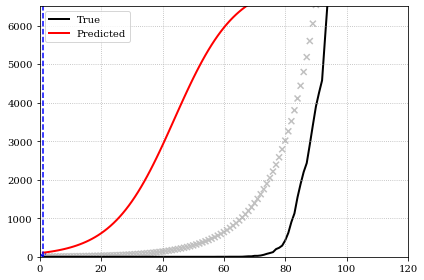

In [18]:

# plot the true curve and the observed points
plt.rcParams["font.family"] = 'serif'
plt.rcParams['font.size'] = 10
fig, ax = plt.subplots(figsize=(6,4))
scat = ax.scatter(_t,y,marker='x',c='b')
plt.plot(_t,f,c='k',lw='2',zorder=1,label='True')
plt.ylim(0,6500)
plt.xlim(0,120)
plt.grid(ls=':')
plt.tight_layout()
line, = ax.plot([], [], c='r',lw=2,zorder=2,label='Predicted')
line2, = ax.plot([], [], c='b',ls='--')
plt.legend(loc=2)

def data_gen(t=1):
    while t < 125.9:
        t += 0.1
        opt1 = opt_param[int(t)]
        opt2 = opt_param[int(t)+1]
        y1 = _f(opt1[0],opt1[1],opt1[2],_t)
        y2 = _f(opt2[0],opt2[1],opt2[2],_t)
        frac = float(t%1)
        yield t, frac*y2+(1-frac)*y1


def run(data):
    t, x = data
    line2.set_data([t,t],[0,9000])
    line.set_data(_t,x)
    scat.set_color(['b']*int(t)+['silver']*(len(y)-int(t)))

    return line, line2, scat

ani = animation.FuncAnimation(fig, run, data_gen, blit=False, interval=2,
                              repeat=False,save_count=1200)
FFwriter=animation.FFMpegWriter(fps=75, extra_args=['-vcodec', 'libx264'])


ani.save('mymovie.mp4', writer=FFwriter,dpi=150)


plt.show()

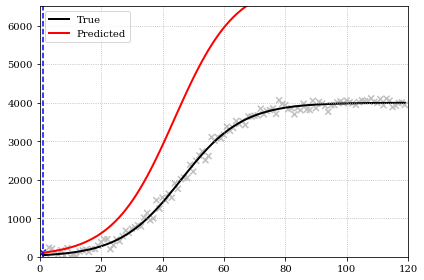

In [19]:
# Código inteiro da autora retirado do GitHub

import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.animation as animation
from matplotlib import cm

# s curve function
def _f(a,b,c,t):
    return c*1/(1+a*np.exp(-b*t))
# function for s curve with added noise
def _y(a,b,c,d,t):
    return abs(c/(1+a*np.exp(-b*t))+np.random.normal(0,d))

# the time series at which points are observed
_t = np.arange(1,120,1)

# observed and true values of the s-curve for integer values of t
f = [43.723616034283943, 48.266580975107217, 53.275212159450973, 58.795856792825646,
     64.879174084617475, 71.580470799769714, 78.960048190561636, 87.083556938055253,
     96.022355600521379, 105.85386671473393, 116.66192310116948, 128.53709506424013,
     141.5769870372946, 155.88648979144884, 171.57797161265069, 188.77138887675781,
     207.59429326740255, 228.1817095693043, 250.67585465655233, 275.22566515990553,
     301.98609858030431, 331.11717062914062, 362.78269070698775, 397.14865814499052,
     434.38128465822456, 474.64461397696414, 518.09771842115811, 564.89146481498233,
     615.16485903497653, 669.04099986779647, 726.62269861844629, 787.98785050875972,
     853.18467623290428, 922.22698534347012, 995.08964500886123, 1071.7044650754437,
     1151.9567298029981, 1235.6826144811646, 1322.6677180006561, 1412.6469177396746,
     1505.3057095390855, 1600.2831335834537, 1697.1763093065156, 1795.5465138138186,
     1894.9266454960866, 1994.8298255288225, 2094.7588132380479, 2194.215854583143,
     2292.7125522167221, 2389.7793440369678, 2484.9742050168547, 2577.8902413784981,
     2668.1619211658631, 2755.4697733666812, 2839.5434805437112, 2920.1633793353594,
     2997.160462273443, 3070.4150381097552, 3139.8542533870909, 3205.4487046224694,
     3267.2083793191546, 3325.1781575854652, 3379.4330877343814, 3430.0736225011201,
     3477.2209709613221, 3521.0126879510767, 3561.5985902692487, 3599.137058999871,
     3633.7917610969921, 3665.7288015273439, 3695.1142999112944, 3722.1123725472939,
     3746.8834915335397, 3769.5831868717055, 3790.3610543615559, 3809.3600311899618,
     3826.715901845901, 3842.5569988833886, 3857.0040657113091, 3870.1702516936716,
     3882.1612131477909, 3893.0752971468264, 3903.0037882357337, 3912.0312011688984,
     3920.2356055207242, 3927.6889704810196, 3934.4575203181407, 3940.6020928812341,
     3946.1784951342242, 3951.2378510897142, 3955.8269386647025, 3959.9885129371073,
     3963.7616140671225, 3967.1818587838879, 3970.2817148473991, 3973.0907582977011,
     3975.6359136154538, 3977.941677155382, 3980.0303243899798, 3981.9221016266465,
     3983.6354029467188, 3985.1869331678331, 3986.5918576584759, 3987.8639398410955,
     3989.0156672124454, 3990.0583666906268, 3991.0023100707972, 3991.8568103380594,
     3992.6303095487706, 3993.3304589518016, 3993.9641919805886, 3994.5377907058119,
     3995.0569462981925, 3995.5268140115572, 3995.9520631584564, 3996.3369225144625,
     3996.6852215529962, 3997.0004278802385, 3997.2856812093846]

y = [107.64996241684651, 75.644293785293215, 238.03834193128432, 212.84885430223056,
     129.20759397417027, 56.393322676763646, 170.12889442681342, 33.366488761391047,
     225.47781802730543, 10.952977852756348, 34.181242119954476, 11.503160420741779,
     140.66878464822102, 167.22673954320516, 187.4695305651741, 124.86097874381383,
     205.41008895562359, 201.8017249612241, 288.25758938303255, 381.68713597628516,
     454.89582917386525, 457.39038542311926, 197.2879868717402, 304.2219466604754,
     451.92884422920019, 403.73303635917949, 534.11348429490295, 677.94499039009679,
     617.26532641811457, 728.88982652908317, 768.02740562418035, 819.42701562256366,
     788.04269661376838, 1016.4573174924733, 1137.7235689874294, 947.83405244780897,
     996.48743686367652, 1467.6315386660849, 1250.9504924124185, 1536.4436760895942,
     1461.8396409582242, 1640.9866287797483, 1534.468731605717, 1906.7615586382337,
     1763.7863548454397, 2017.9110034235543, 2056.2614086348867, 2048.1548195727805,
     2390.1413523091219, 2211.4613065477506, 2491.4135842189789, 2628.9074086839596,
     2739.4225587555588, 2505.7456511682417, 2615.1113563315175, 3106.1805804247019,
     3011.2364283040265, 3109.0005441173803, 3075.5685776905339, 3163.8849100225507,
     3378.8253871787128, 3269.4296466560263, 3345.6872745083624, 3523.2744933424242,
     3445.2254022292273, 3523.8527872843574, 3419.066957109414, 3643.4758745491936,
     3639.8258099536629, 3663.491424107187, 3670.0470771043165, 3843.4877746757547,
     3698.6798155844672, 3783.8738219272536, 3809.5095544095061, 3853.0073182972542,
     3708.6473522752531, 4065.2531114095095, 3965.6247858108045, 3936.569950277787,
     3832.4227471130566, 3856.313366930161, 3697.578731615949, 3861.2882573059915,
     3803.9775412821677, 3974.4093591269816, 3820.9622954701817, 3808.941102006147,
     4049.7394097249962, 3859.7000474242068, 4020.5594156009602, 3977.3167191564257,
     3917.1219937629903, 3764.8918669464924, 3937.9162636736573, 3940.8749799135685,
     4005.1404397169922, 4032.7789472279251, 3989.4915477996387, 4057.3531010554461,
     4013.6726137807759, 3985.4071469252058, 3943.3014318463042, 4016.6254087962311,
     4062.560331786301, 4038.0817403385199, 4043.1318296967193, 4113.549877647798,
     4019.4294152727889, 3999.0073588161522, 4094.6441108375552, 3933.0748050644411,
     4104.3562663660023, 4051.9917629860529, 3885.8223745044797, 3918.0688583897108,
     3995.4162178647953, 4004.6417834949148, 3944.2031935737714]

# these are the s-curve parameters at each time-step using historic data
opt_param = {1:[80, 0.099999999999999992, 7900], 2:[20, 0.01, 1900],
             3:[80, 0.19, 7900], 4:[70, 0.19, 7100],
             5:[20, 0.099999999999999992, 2400], 6:[30, 0.01, 4100],
             7:[30, 0.01, 4200], 8:[30, 0.01, 3800], 9:[30, 0.01, 4100],
             10:[20, 0.01, 2500], 11:[20, 0.01, 2300], 12:[20, 0.01, 2100],
             13:[20, 0.01, 2200], 14:[20, 0.01, 2200], 15:[20, 0.01, 2300],
             16:[20, 0.01, 2300], 17:[20, 0.01, 2400], 18:[60, 0.02, 6500],
             19:[80, 0.040000000000000001, 7300],
             20:[120, 0.069999999999999993, 7900],
             21:[170, 0.099999999999999992, 7600],
             22:[200, 0.11, 7800], 23:[130, 0.080000000000000002, 7800],
             24:[110, 0.069999999999999993, 7700],
             25:[130, 0.080000000000000002, 7700],
             26:[50, 0.080000000000000002, 3100],
             27:[130, 0.080000000000000002, 7700],
             28:[160, 0.089999999999999997, 7900],
             29:[160, 0.089999999999999997, 7900],
             30:[150, 0.089999999999999997, 7600],
             31:[150, 0.089999999999999997, 7600],
             32:[150, 0.089999999999999997, 7600],
             33:[150, 0.089999999999999997, 7500],
             34:[150, 0.089999999999999997, 7600],
             35:[140, 0.099999999999999992, 5600],
             36:[140, 0.089999999999999997, 7100],
             37:[60, 0.099999999999999992, 2700],
             38:[150, 0.089999999999999997, 7600],
             39:[130, 0.089999999999999997, 6600],
             40:[150, 0.089999999999999997, 7500],
             41:[120, 0.089999999999999997, 6200],
             42:[120, 0.089999999999999997, 6200],
             43:[80, 0.099999999999999992, 3500],
             44:[100, 0.089999999999999997, 5300],
             45:[80, 0.099999999999999992, 3500],
             46:[80, 0.099999999999999992, 3500],
             47:[80, 0.099999999999999992, 3500],
             48:[80, 0.099999999999999992, 3500],
             49:[90, 0.099999999999999992, 3800],
             50:[80, 0.099999999999999992, 3500],
             51:[90, 0.099999999999999992, 3800],
             52:[90, 0.099999999999999992, 3800],
             53:[90, 0.089999999999999997, 4800],
             54:[90, 0.099999999999999992, 3800],
             55:[90, 0.099999999999999992, 3700],
             56:[90, 0.099999999999999992, 3800],
             57:[80, 0.089999999999999997, 4400],
             58:[80, 0.089999999999999997, 4400],
             59:[80, 0.089999999999999997, 4400],
             60:[80, 0.089999999999999997, 4400],
             61:[80, 0.089999999999999997, 4400],
             62:[80, 0.089999999999999997, 4400],
             63:[100, 0.099999999999999992, 4000],
             64:[80, 0.089999999999999997, 4400],
             65:[100, 0.099999999999999992, 4000],
             66:[100, 0.099999999999999992, 4000],
             67:[100, 0.099999999999999992, 4000],
             68:[100, 0.099999999999999992, 4000],
             69:[100, 0.099999999999999992, 4000],
             70:[100, 0.099999999999999992, 4000],
             71:[100, 0.099999999999999992, 4000],
             72:[100, 0.099999999999999992, 4000],
             73:[100, 0.099999999999999992, 4000],
             74:[100, 0.099999999999999992, 4000],
             75:[100, 0.099999999999999992, 4000],
             76:[100, 0.099999999999999992, 4000],
             77:[100, 0.099999999999999992, 4000],
             78:[100, 0.099999999999999992, 4000],
             79:[100, 0.099999999999999992, 4000],
             80:[100, 0.099999999999999992, 4000],
             81:[100, 0.099999999999999992, 4000],
             82:[100, 0.099999999999999992, 4000],
             83:[100, 0.099999999999999992, 4000],
             84:[100, 0.099999999999999992, 4000],
             85:[100, 0.099999999999999992, 4000],
             86:[100, 0.099999999999999992, 4000],
             87:[100, 0.099999999999999992, 4000],
             88:[100, 0.099999999999999992, 4000],
             89:[100, 0.099999999999999992, 4000],
             90:[100, 0.099999999999999992, 4000],
             91:[100, 0.099999999999999992, 4000],
             92:[100, 0.099999999999999992, 4000],
             93:[100, 0.099999999999999992, 4000],
             94:[100, 0.099999999999999992, 4000],
             95:[100, 0.099999999999999992, 4000],
             96:[100, 0.099999999999999992, 4000],
             97:[100, 0.099999999999999992, 4000],
             98:[100, 0.099999999999999992, 4000],
             99:[100, 0.099999999999999992, 4000],
             100:[100, 0.099999999999999992, 4000],
             101:[100, 0.099999999999999992, 4000],
             102:[100, 0.099999999999999992, 4000],
             103:[100, 0.099999999999999992, 4000],
             104:[100, 0.099999999999999992, 4000],
             105:[100, 0.099999999999999992, 4000],
             106:[100, 0.099999999999999992, 4000],
             107:[100, 0.099999999999999992, 4000],
             108:[100, 0.099999999999999992, 4000],
             109:[100, 0.099999999999999992, 4000],
             110:[100, 0.099999999999999992, 4000],
             111:[100, 0.099999999999999992, 4000],
             112:[100, 0.099999999999999992, 4000],
             113:[100, 0.099999999999999992, 4000],
             114:[100, 0.099999999999999992, 4000],
             115:[100, 0.099999999999999992, 4000],
             116:[100, 0.099999999999999992, 4000],
             117:[100, 0.099999999999999992, 4000],
             118:[100, 0.099999999999999992, 4000],
             119:[100, 0.099999999999999992, 4000],
             120:[100, 0.099999999999999992, 4000]}


# plot the true curve and the observed points
plt.rcParams["font.family"] = 'serif'
plt.rcParams['font.size'] = 10
fig, ax = plt.subplots(figsize=(6,4))
scat = ax.scatter(_t,y,marker='x',c='b')
plt.plot(_t,f,c='k',lw='2',zorder=1,label='True')
plt.ylim(0,6500)
plt.xlim(0,120)
plt.grid(ls=':')
plt.tight_layout()
line, = ax.plot([], [], c='r',lw=2,zorder=2,label='Predicted')
line2, = ax.plot([], [], c='b',ls='--')
plt.legend(loc=2)

def data_gen(t=1):
    while t < 119.9:
        t += 0.1
        opt1 = opt_param[int(t)]
        opt2 = opt_param[int(t)+1]
        y1 = _f(opt1[0],opt1[1],opt1[2],_t)
        y2 = _f(opt2[0],opt2[1],opt2[2],_t)
        frac = float(t%1)
        yield t, frac*y2+(1-frac)*y1


def run(data):
    t, x = data
    line2.set_data([t,t],[0,9000])
    line.set_data(_t,x)
    scat.set_color(['b']*int(t)+['silver']*(len(y)-int(t)))

    return line, line2, scat

ani = animation.FuncAnimation(fig, run, data_gen, blit=False, interval=2,
                              repeat=False,save_count=1200)
FFwriter=animation.FFMpegWriter(fps=75, extra_args=['-vcodec', 'libx264'])
ani.save('hermovie.mp4', writer=FFwriter,dpi=150)

plt.show()

In [ ]:
# https://github.com/matplotlib/matplotlib/issues/760